## Analiza rabljenih avtomobilov

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

avti = pd.read_csv("../podatki/rabljeni_avtomobili.csv", index_col=0)
avti.sample(frac=0.001).head(5)

,ime_znamke,ime_modela,ime_razlicice,tip_modela,menjalnik,vrsta_motorja,stevilo_vrat,stevilo_prestav,konjske_moci,kilovati,prostornina_motorja,povezava,naslov_oglasa,leto_izdelave,stevilo_kilometrov,cena,platforma,id_razlicice,id_modela
15265,Renault,Espace,Espace,KOMBI,AVTOMATSKI,DIEZEL,NaN,6.0,173.0,127.0,1.995,https://www.avto.net/Ads/details.asp?id=177624...,Renault Espace Initiale 2.0 dCi AVTOMATIK-SLOV...,2008.0,318673.0,4450.0,avtonet,22053.0,2204.0
13960,Peugeot,3008,3008,KOMBI,ROČNI,BENCIN,NaN,6.0,131.0,96.0,1.199,https://www.avto.net/Ads/details.asp?id=177342...,Peugeot 3008 1.2 PureTech 130 S S Active,2018.0,136229.0,18490.0,avtonet,20231.0,1987.0
18939,Volkswagen,Golf,NaN,NaN,ROČNI,DIEZEL,NaN,NaN,170.0,125.0,1.968,https://www.avto.net/Ads/details.asp?id=177381...,Volkswagen Golf 2.0 TDI GTD 125 170 GRETJE-Š...,2010.0,248182.0,9990.0,avtonet,NaN,NaN
9642,Mercedes-Benz,A-Razred,A-Class Sedan (V177),NaN,AVTOMATSKI,DIEZEL,NaN,7.0,116.0,85.0,1.461,https://www.avto.net/Ads/details.asp?id=177763...,Mercedes-Benz A-Razred A 180 d,2020.0,48000.0,27450.0,avtonet,16678.0,1650.0
19531,Volkswagen,Golf Variant,Golf VII Variant,KARAVAN,ROČNI,DIEZEL,NaN,5.0,90.0,66.0,1.598,https://www.avto.net/Ads/details.asp?id=177334...,Volkswagen Golf Variant 1.6 TDI Cool Sound PAR...,2015.0,191608.0,9250.0,avtonet,26960.0,2630.0


In [3]:
avti["starost"] = 2022 - avti.leto_izdelave

## Normiranje cene

ceno avtomobila bom normiral s povprečno ceno avtomobila istega modela, ki je bil izdelan letos.

In [33]:
nazivne_cene_modelov = avti[(avti.leto_izdelave == 2022) & (avti.stevilo_kilometrov < 5e3)].groupby(["ime_znamke", "ime_modela"]).cena.mean().rename("nazivna_cena")
avti_z_nc = pd.merge(avti, nazivne_cene_modelov, on=["ime_znamke", "ime_modela"])
avti_z_nc["normirana_cena"] = avti_z_nc.cena / avti_z_nc.nazivna_cena

#### Upad cene s starostjo
temneje -> več kilometrov

<AxesSubplot:xlabel='starost', ylabel='normirana_cena'>

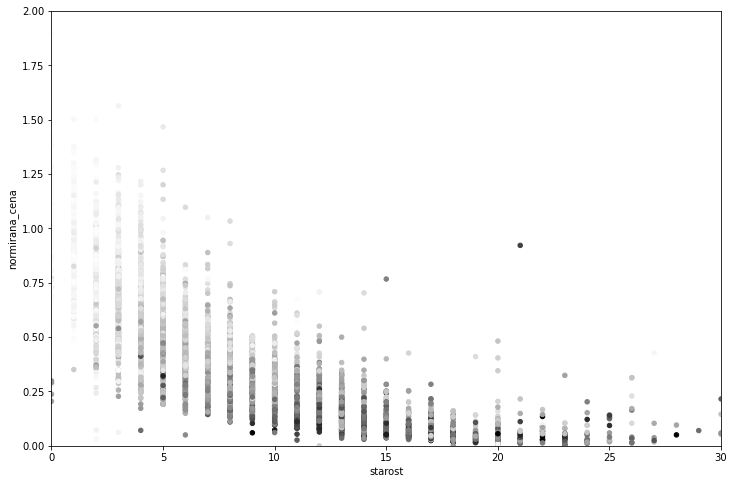

In [40]:
avti_z_nc.plot.scatter(
    "starost", "normirana_cena",
    xlim=(0,30), ylim=(0,2),
    c=avti_z_nc.stevilo_kilometrov.clip(0, 0.4e6),
    figsize=(12,8)
)

temneje -> močnejši motor

<AxesSubplot:xlabel='starost', ylabel='normirana_cena'>

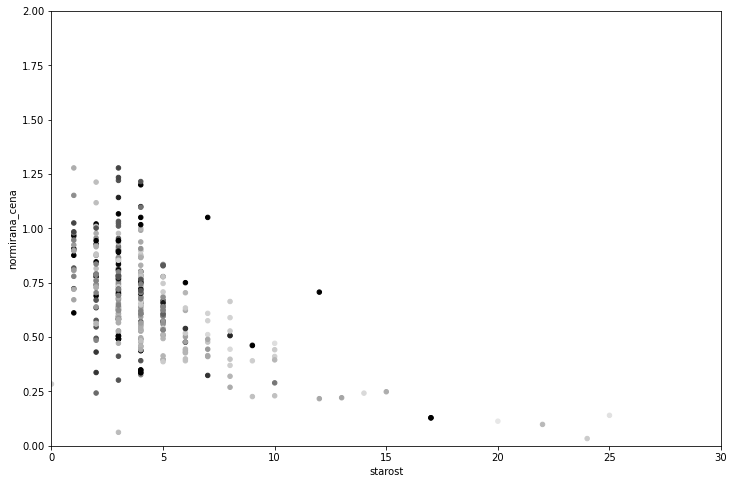

In [51]:
st_kilom = 0.5e5 # 120 000 km
fiks_avti_z_nc = avti_z_nc[
    avti_z_nc.stevilo_kilometrov.between(0.8*st_kilom, 1.2*st_kilom)
]
fiks_avti_z_nc.plot.scatter(
    "starost", "normirana_cena",
    xlim=(0,30), ylim=(0,2),
    c=fiks_avti_z_nc.konjske_moci.clip(0, 250),
    figsize=(12,8)
)

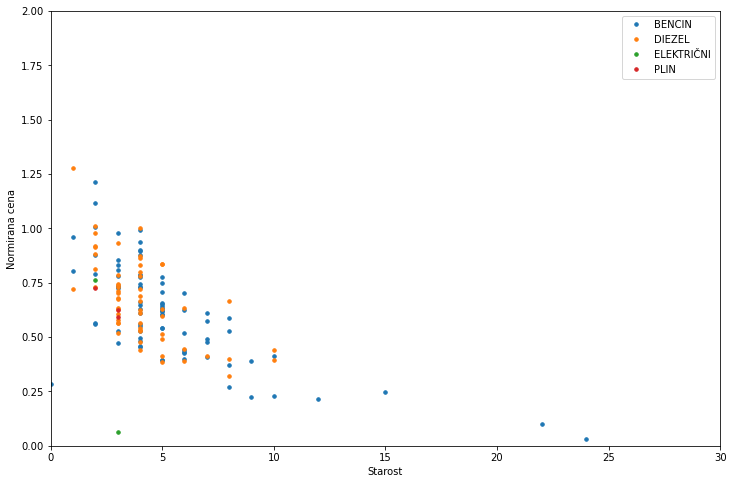

In [55]:
fig, ax = plt.subplots(figsize=(12,8))

fiks_moc_avti_z_nc = fiks_avti_z_nc[fiks_avti_z_nc.konjske_moci.between(80, 120)]

for ime, skupina in fiks_moc_avti_z_nc.groupby("vrsta_motorja"):
    ax.plot(
        skupina.starost,
        skupina.normirana_cena,
        marker='.',
        linestyle='',
        ms=7,
        label=ime,
    )
ax.set_xlabel("Starost")
ax.set_ylabel("Normirana cena")
ax.set_xlim(0,30)
ax.set_ylim(0,2)
ax.legend(numpoints=1, loc='upper right')

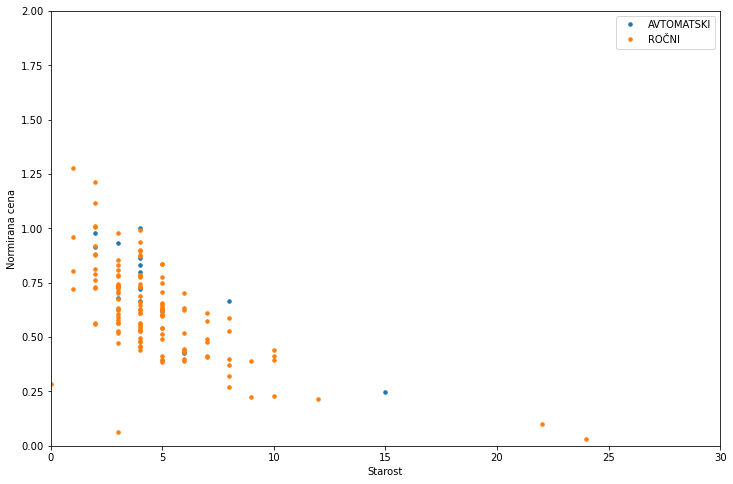

In [56]:
fig, ax = plt.subplots(figsize=(12,8))

for ime, skupina in fiks_moc_avti_z_nc.groupby("menjalnik"):
    ax.plot(
        skupina.starost,
        skupina.normirana_cena,
        marker='.',
        linestyle='',
        ms=7,
        label=ime,
    )
ax.set_xlabel("Starost")
ax.set_ylabel("Normirana cena")
ax.set_xlim(0,30)
ax.set_ylim(0,2)
ax.legend(numpoints=1, loc='upper right')

### Slani avtomobili

In [123]:
avti[avti.ime_modela.str.contains("slan", na=False)].head(3)

,ime_znamke,ime_modela,ime_razlicice,tip_modela,menjalnik,vrsta_motorja,stevilo_vrat,stevilo_prestav,konjske_moci,kilovati,prostornina_motorja,povezava,naslov_oglasa,leto_izdelave,stevilo_kilometrov,cena,platforma,id_razlicice,id_modela
12866,Opel,Crossland,Crossland,SUV,ROČNI,BENCIN,NaN,5.0,110.0,81.0,1.199,https://www.avto.net/Ads/details.asp?id=177754...,Opel Crossland 1.2 TURBO 81KW ELEGANCE,2022.0,1050.0,23100.0,avtonet,19491.0,1930.0
12867,Opel,Crossland,Crossland,SUV,ROČNI,DIEZEL,NaN,6.0,110.0,81.0,1.499,https://www.avto.net/Ads/details.asp?id=177744...,Opel Crossland 1.5 CDTI 81KW EDITION,2021.0,17823.0,17950.0,avtonet,19496.0,1930.0
12868,Opel,Crossland,Astra Sport Sedan,NaN,ROČNI,BENCIN,NaN,5.0,100.0,NaN,NaN,https://www.avto.net/Ads/details.asp?id=177703...,Opel Crossland 1.2 TURBO INNOVATION+SLO+1.LAST...,2018.0,30000.0,15870.0,avtonet,19376.0,1919.0


### Število prestav skozi leta

<AxesSubplot:xlabel='leto_izdelave'>

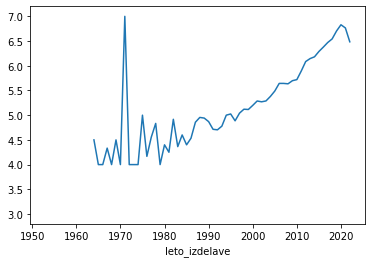

In [125]:
avti.groupby("leto_izdelave").stevilo_prestav.mean().plot()

### Najpogostejši modeli in različice posameznega modela
*Opomba*: oznaka **različica** predstavlja določeno izvedbo modela avtomobila (npr. z določenim motorjem in menjalnikom).

In [126]:
razlicice = avti.groupby(["ime_znamke", "ime_razlicice", "id_razlicice"])
naj_razlicice = razlicice.size().sort_values(ascending=False)
naj_modeli = avti.groupby("id_modela").size().sort_values(ascending=False)

naj_razlicice.head(6)

ime_znamke     ime_razlicice         id_razlicice
Mercedes-Benz  A-Class Sedan (V177)  16678.0         287
Volkswagen     Passat Variant        27296.0         272
Mercedes-Benz  CLA (C117)            16264.0         269
Volkswagen     Passat Variant        27295.0         206
               Tiguan                27026.0         192
               Passat Variant        27283.0         171
dtype: int64

In [218]:
# poiščemo cenovni razred, kjer je
# povprečna cena za avto
# izdelan med leti 2020 in 2021
# in ima zdaj določeno ceno
razlicice_med_leti = avti[avti.leto_izdelave.between(2020, 2021)].groupby(["ime_znamke", "ime_razlicice", "id_razlicice"])
cenovni_razred = razlicice_med_leti.filter(lambda r: 2e4 < r.cena.mean() < 2.15e4)

In [219]:
avti_v_cen_razredu = avti[
    avti.id_razlicice.isin(cenovni_razred.id_razlicice)
    & avti.leto_izdelave.between(2010, 2021)
]

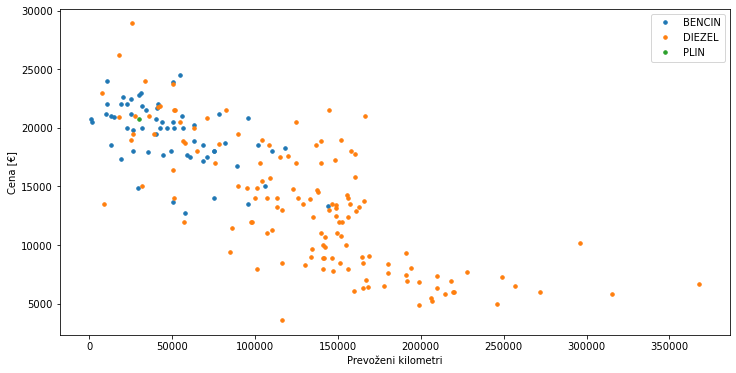

In [220]:
fig, ax = plt.subplots(figsize=(12,6))

for ime, skupina in avti_v_cen_razredu.groupby("vrsta_motorja"):
    ax.plot(
        skupina.stevilo_kilometrov,
        skupina.cena,
        marker='.',
        linestyle='',
        ms=7,
        label=ime,
    )
ax.set_xlabel("Prevoženi kilometri")
ax.set_ylabel("Cena [€]")

ax.legend(numpoints=1, loc='upper right')

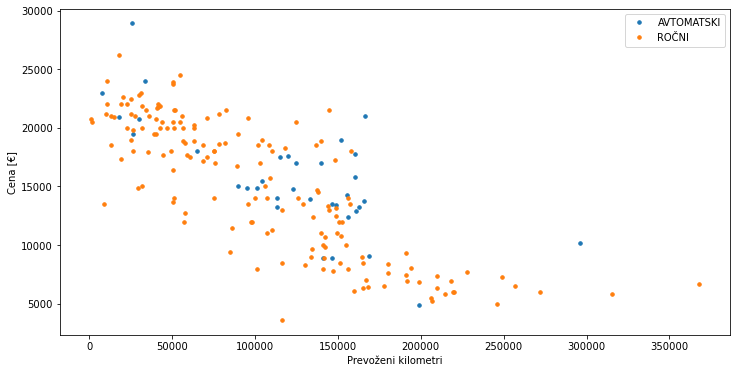

In [221]:
fig, ax = plt.subplots(figsize=(12,6))

for ime, skupina in avti_v_cen_razredu.groupby("menjalnik"):
    ax.plot(skupina.stevilo_kilometrov, skupina.cena, marker='.', linestyle='', ms=7, label=ime)
ax.set_xlabel("Prevoženi kilometri")
ax.set_ylabel("Cena [€]")
ax.legend(numpoints=1, loc='upper right')

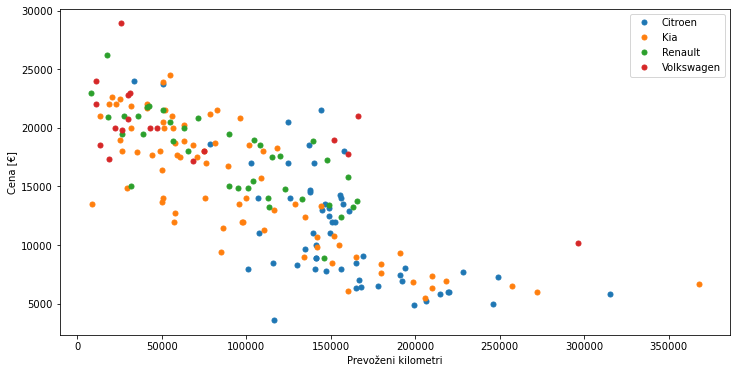

In [222]:
fig, ax = plt.subplots(figsize=(12,6))

najpogost_znamke_v_cen_razredu = avti_v_cen_razredu.groupby("ime_znamke").filter(lambda r: r.size > 100).groupby("ime_znamke")

for ime, skupina in najpogost_znamke_v_cen_razredu:
    ax.plot(skupina.stevilo_kilometrov, skupina.cena, marker='.', linestyle='', ms=10, label=ime)
ax.set_xlabel("Prevoženi kilometri")
ax.set_ylabel("Cena [€]")
ax.legend(numpoints=1, loc='upper right')

<AxesSubplot:xlabel='starost', ylabel='cena'>

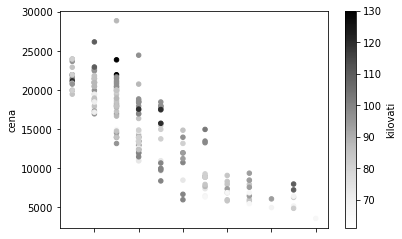

In [224]:
avti_v_cen_razredu.plot.scatter("starost", "cena", c="kilovati")

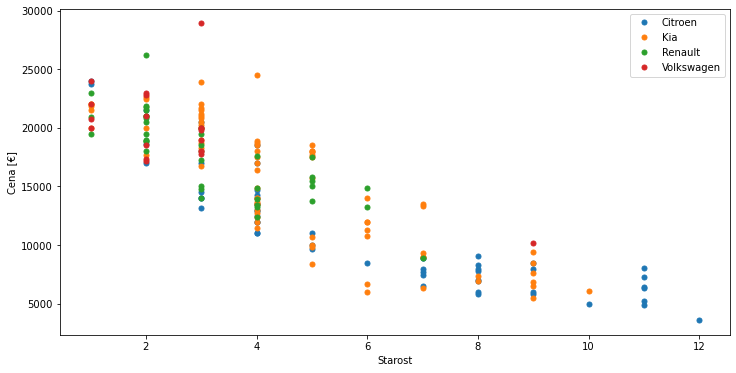

In [227]:
fig, ax = plt.subplots(figsize=(12,6))

najpogost_znamke_v_cen_razredu = avti_v_cen_razredu.groupby("ime_znamke").filter(lambda r: r.size > 100).groupby("ime_znamke")

for ime, skupina in najpogost_znamke_v_cen_razredu:
    ax.plot(skupina.starost, skupina.cena, marker='.', linestyle='', ms=10, label=ime)
ax.set_xlabel("Starost")
ax.set_ylabel("Cena [€]")
ax.legend(numpoints=1, loc='upper right')

<AxesSubplot:xlabel='leto_izdelave', ylabel='cena'>

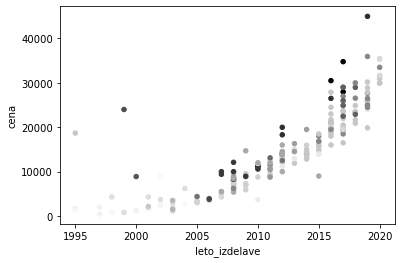

In [65]:
naj_model = avti[avti.id_modela.isin(cen_razred)]
naj_model.plot.scatter("leto_izdelave", "cena", c=naj_model.kilovati, legend=True)

<AxesSubplot:xlabel='kilovati', ylabel='cena'>

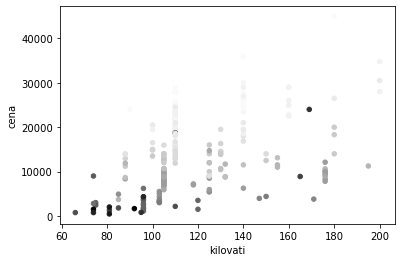

In [66]:
naj_model.plot.scatter("kilovati", "cena", c=(2022-naj_model.leto_izdelave)/25)

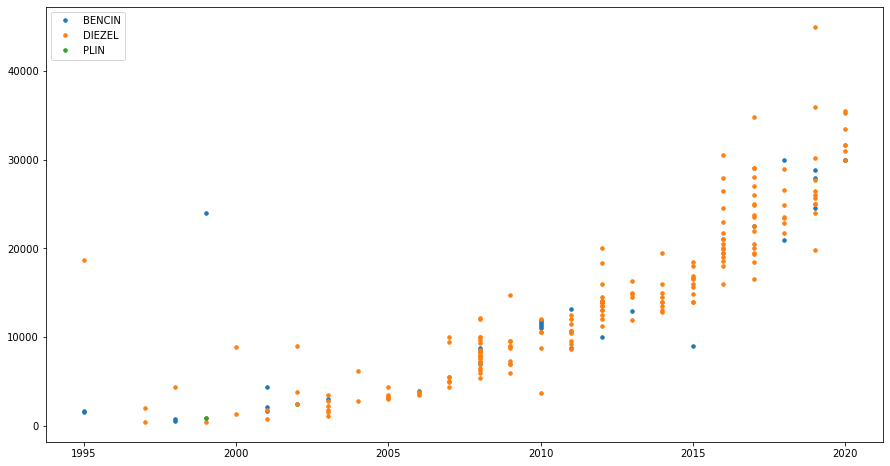

In [67]:

for name, group in naj_model.groupby("vrsta_motorja"):
    ax.plot(group.leto_izdelave, group.cena, marker='.', linestyle='', ms=7, label=name)
ax.legend(numpoints=1, loc='upper left')

<AxesSubplot:xlabel='vrsta_motorja'>

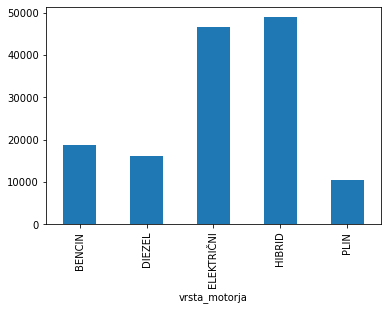

In [20]:
avti.groupby("vrsta_motorja").mean().cena.plot.bar()

<AxesSubplot:xlabel='leto_izdelave'>

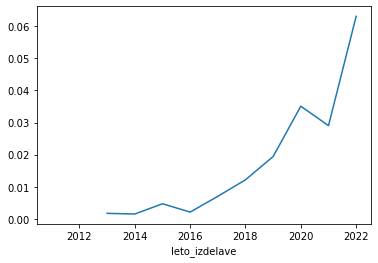

In [30]:
el_avti_po_letih = avti[avti.vrsta_motorja == "ELEKTRIČNI"].groupby("leto_izdelave").size()
avti_po_letih = avti.groupby("leto_izdelave").size()

(el_avti_po_letih / avti_po_letih).plot()